In [1]:
# cd to gdrive for files
%cd /content/drive/My Drive/Data Science/

/content/drive/My Drive/Data Science


In [2]:
import pandas as pd
import numpy as np

# Q1
try:
  book_df = pd.read_csv("BL-Flickr-Images-Book.csv")
except FileNotFoundError:
  print("File not found!")
except PermissionError:
  print("No permissions to read file")
except Exception as e:
  print("error: ", e)


In [3]:
# Dropping unwanted columns
print(book_df.columns)
drop_cols = [
    'Edition Statement',
    'Corporate Author',
    'Corporate Contributors',
    'Former owner',
    'Engraver',
    'Shelfmarks',
    'Contributors',
    'Issuance type'
]

book_df.drop(drop_cols, inplace=True, axis=1)

Index(['Identifier', 'Edition Statement', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author', 'Contributors',
       'Corporate Author', 'Corporate Contributors', 'Former owner',
       'Engraver', 'Issuance type', 'Flickr URL', 'Shelfmarks'],
      dtype='object')


In [5]:
# Changing indices for your dataframe
book_df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [9]:
book_df['Identifier'].is_unique

True

In [10]:
book_df.set_index('Identifier', inplace=True)
book_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [13]:
# Handling duplicate data
duplicates = book_df[book_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Place of Publication, Date of Publication, Publisher, Title, Author, Flickr URL]
Index: []


In [16]:
# Tidying fields and Data Type conversion
book_df.dtypes

,0
Place of Publication,object
Date of Publication,object
Publisher,object
Title,object
Author,object
Flickr URL,object


In [17]:
book_df.loc[1900:, 'Date of Publication']


,Date of Publication
Identifier,
1905,1888
1929,"1839, 38-54"
2836,1897
2854,1865
2956,1860-63
...,...
4158088,1838
4158128,"1831, 32"
4159563,[1806]-22


In [18]:
import re

pattern = r'^(\d{4})'
# extracts data that have dates as only 4 digits
extr = book_df['Date of Publication'].str.extract(pattern, expand=False)
print(extr)

Identifier
206        1879
216        1868
218        1869
472        1851
480        1857
           ... 
4158088    1838
4158128    1831
4159563     NaN
4159587    1834
4160339    1834
Name: Date of Publication, Length: 8287, dtype: object


In [21]:
book_df['Date of Publication'] = pd.to_numeric(extr)
book_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [24]:
# handling missing values
# this prints out totals of data that is missing
# i.e., Date of publication = 971 so 971 rows missing data
book_df.isnull().sum()

,0
Place of Publication,0
Date of Publication,971
Publisher,4195
Title,0
Author,1778
Flickr URL,0


In [26]:
# Dealing with outliers
# attributes far away from usual distribution
# IQR methods: compute Q1 and Q3; IQR = Q3 - Q1; lowerbound and upper bound defined by the value Q3 + or - 1.5 * Q1. Upper bound is Q3 + 1.5 * Q1
# Zscore: (x - avg) / std
# Assumption for Zscore assumes the data is in normal distribution
# if x > or < 3
derm_df = pd.read_csv('dermatology_database_1.csv')
derm_df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [27]:
derm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

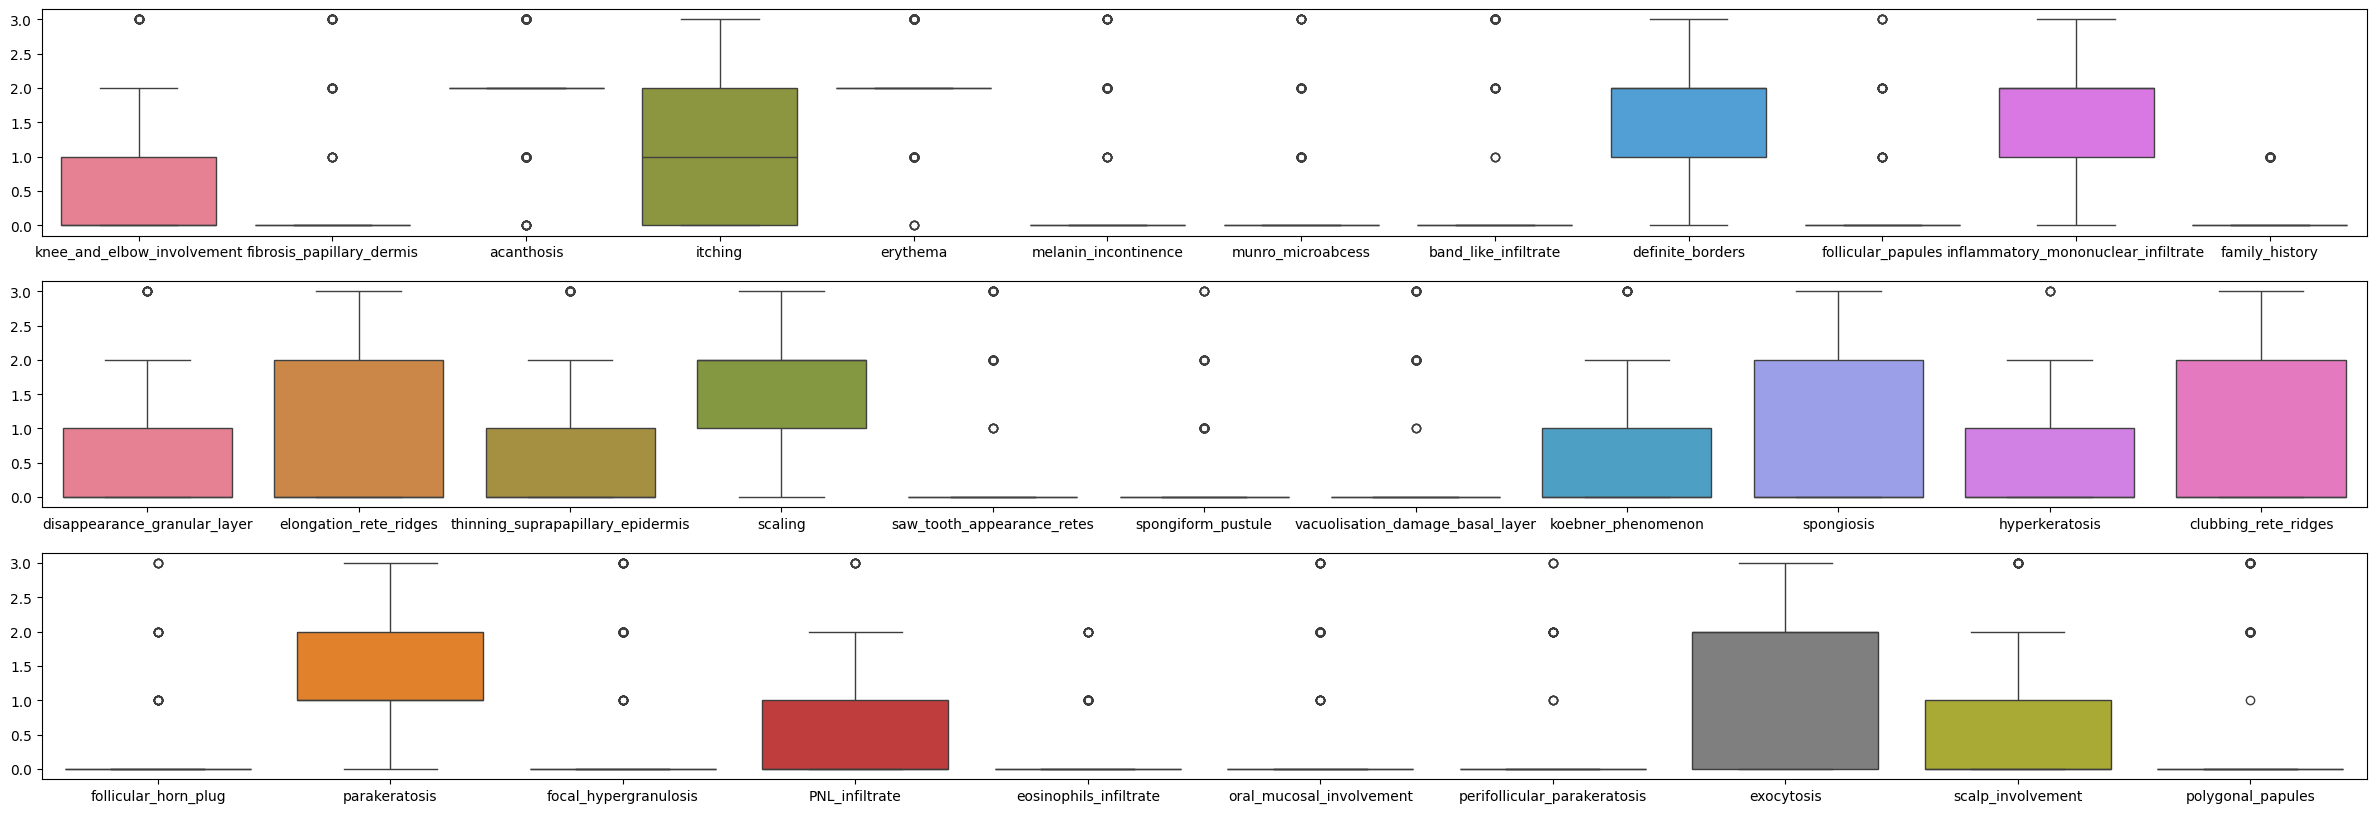

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, figsize=(30, 10))
target = ['class']
predictors = list(set(derm_df.columns) - set(target))
predictors_1, predictors_2, predictors_3 = [predictors[i::3] for i in range(3)]
sns.boxplot(ax=axs[0], data=derm_df[predictors_1])
sns.boxplot(ax=axs[1], data=derm_df[predictors_2])
sns.boxplot(ax=axs[2], data=derm_df[predictors_3])